### A convolution al neural network (CNN) is a type of artificial network used primarily for image recongition
### and processing, due to its ability to recognize patterns in images. A CNN is a powerful tool but requires millions of 
### labelled data points for training

In [37]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [38]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [39]:
X_train.shape

(50000, 32, 32, 3)

In [40]:
y_train.shape

(50000, 1)

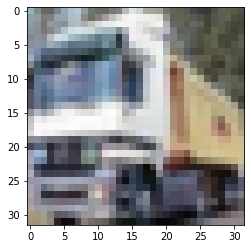

In [41]:
plt.imshow(X_train[1])

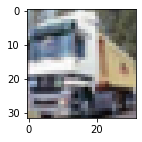

In [42]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [43]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [44]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [45]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [46]:
classes[9]

'truck'

In [111]:
def plot_sample(X, y, index):
    plt.figsize=(15,2)
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

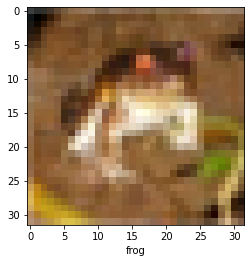

In [112]:
plot_sample(X_train, y_train, 0)

In [113]:
classes[6]

'frog'

In [114]:
# Normalization
X_train = X_train/255

In [115]:
X_test = X_test/255

In [116]:
# this will perform poorly on this dataset
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [117]:
ann.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [97]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.8817 - accuracy: 0.3267
Epoch 2/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.6697 - accuracy: 0.3990
Epoch 3/5
1563/1563 [==============================] - 66s 43ms/step - loss: 1.5857 - accuracy: 0.4301
Epoch 4/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.5329 - accuracy: 0.4515
Epoch 5/5
1563/1563 [==============================] - 68s 44ms/step - loss: 1.4980 - accuracy: 0.4645


In [118]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.14      0.01      0.02      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.12      0.16      0.14      1000
           6       0.00      0.00      0.00      1000
           7       0.10      0.86      0.18      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.04      0.10      0.03     10000
weighted avg       0.04      0.10      0.03     10000



C:\Users\josep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
# Improve performance
# Question: Conv2D, MaxPooling2D, softmax, sparese_categorical_crossentropy

In [120]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(), # cnn network can figure out dimensions; cnn will do most of the work, no need for many layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [121]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4623 - accuracy: 0.4765
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1214 - accuracy: 0.6062
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9927 - accuracy: 0.6544
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9065 - accuracy: 0.6859
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8373 - accuracy: 0.7090
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7764 - accuracy: 0.7298
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7261 - accuracy: 0.7460
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6787 - accuracy: 0.7628
Epoch 9/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6377 - accuracy: 0.7766
Epoch 10/10
1563/1563 [==============================] - 20s 13m

In [122]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 2.3026 - accuracy: 0.0956


[2.3025851249694824, 0.09560000151395798]

In [123]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

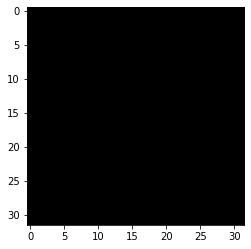

In [124]:
# try for all 5 values
# Actual: array[3, 8, 8, 0, 6]
# Predicted:   [3, 8, 8, 0 ,6]
plot_sample(X_test, y_test, 1)

In [104]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[4.44244331e-04, 5.13559626e-03, 6.04807807e-04, 8.14873040e-01,
        7.63433636e-04, 1.86932217e-02, 3.06358952e-02, 2.50027497e-05,
        1.25393778e-01, 3.43097746e-03],
       [8.68834704e-02, 8.49930823e-01, 3.88142780e-06, 3.49241063e-08,
        2.22268326e-07, 2.10518691e-09, 1.98207424e-08, 8.82645868e-09,
        6.30575493e-02, 1.24101440e-04],
       [6.54557394e-03, 3.69145945e-02, 6.61343394e-04, 4.18374111e-04,
        2.73594371e-04, 1.21499952e-05, 4.30619584e-05, 1.08919594e-04,
        9.54435289e-01, 5.87040267e-04],
       [9.28552687e-01, 1.39038702e-02, 4.87976111e-02, 1.77245514e-04,
        4.84484201e-03, 1.18803500e-05, 2.51772908e-05, 5.22869523e-05,
        3.47352191e-03, 1.60977914e-04],
       [5.03345916e-07, 1.41604134e-04, 1.24672921e-02, 6.75246352e-04,
        1.65147543e-01, 1.50977794e-04, 8.21412027e-01, 3.46736124e-06,
        1.11963936e-06, 2.87271973e-07]], dtype=float32)

In [125]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 7, 5, 5, 7]

TypeError: only integer scalar arrays can be converted to a scalar index

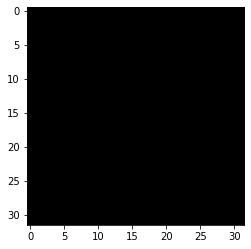

In [126]:
plot_sample(X_test, y_test, 1)